In [153]:
%run dataFormating.ipynb

/home/emma/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (18,22,28,32,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/emma/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (18,22,28,32,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/emma/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (18,22,28,32,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/emma/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (18,22,28,32,38) have mixed types. Specify dtype option on import or set low_memory=False.
 

temporalities already set


A Jupyter Widget

In [154]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LassoCV, Lasso

from ipywidgets import FloatProgress
from IPython.display import display

from math import *

from scipy import stats
from scipy.stats.mstats import normaltest

from matplotlib.pyplot import boxplot

# Questionnaire only

## Can the answers to the scientific questions be used to predict if the questionnaire was filled before or after the game?

Note: I am using only decision tree methods here because other methods like naive bayes do not make sense on categorical data

### If scientific questions are coded by answers

In [155]:
# Select columns that correspond to scientific questions
scientificColumns = [x for x in list(defForms.columns.values) if x[0] == "Q"]

# Pick features and target
features = defForms.loc[:, scientificColumns]
target = defForms["temporality"].astype('int') 

In [156]:
# Classify using decision trees -accounts for the small size of the dataset and the categorical nature of the features
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0, max_features="auto")
scores = cross_val_score(clf, features, target)
scores.mean()

0.7912048877522023

In [157]:
# Classify using random forests -accounts for the small size of the dataset and the categorical nature of the features, limit overfitting
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target)
scores.mean()

0.8494600738846264

In [158]:
# Classify using extra tree classifiers, more random than random forest methods
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target)
scores.mean()

0.8543620346689401

Conclusion: Accuracy is around 75%. Not bad but we expected better (17/01/2018)

## If scientific questions are coded by correctedness

In [159]:
# Select columns that correspond to scientific questions
scientificColumns = [x for x in list(defCorrectedForms.columns.values) if x[0] == "Q"]

# Pick features and target
features = defCorrectedForms.loc[:, scientificColumns]
target = defCorrectedForms["temporality"].astype('int') 

In [160]:
# Classify using decision trees -accounts for the small size of the dataset and the categorical nature of the features
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0, max_features="auto")
scores = cross_val_score(clf, features, target)
scores.mean()

0.7623614663256607

In [161]:
# Classify using random forests -accounts for the small size of the dataset and the categorical nature of the features, limit overfitting
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target)
scores.mean()

0.8204745666382496

In [162]:
# Classify using extra tree classifiers, more random than random forest methods
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target)
scores.mean()

0.8349673202614379

Conclusion: Accuracy is around 75%. Not bad but we expected better (19/12/2017)

# RedMetrics only

In [163]:
allDataClassif

,sessionsCount,scorebefore,scoreafter,scoreundefined,complete,configure,craft,death,equip,unequip,...,7,8,9,10,11,12,13,14,completionTime,anonymousID
"""8d352896-a3f1-471c-8439-0f426df901c1""",1.0,18.0,-1.0,-1.0,0.0,0.0,5.0,5.0,16.0,1.0,...,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,9.223372e+10,8d352896-a3f1-471c-8439-0f426df901c1
"""7037c5b2-c286-498e-9784-9a061c778609""",2.0,-1.0,22.0,-1.0,2.0,0.0,45.0,25.0,3.0,4.0,...,175.314,183.037,547.511,158.229,6.438,27.503,155.083,142.235,2.821648e+03,7037c5b2-c286-498e-9784-9a061c778609
"""5c4939b5-425b-4d19-b5d2-0384a515539e""",1.0,-1.0,15.0,-1.0,0.0,0.0,7.0,11.0,25.0,3.0,...,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,9.223372e+10,5c4939b5-425b-4d19-b5d2-0384a515539e
"""acb9c989-b4a6-4c4d-81cc-6b5783ec71d8""",1.0,23.0,-1.0,-1.0,0.0,1.0,11.0,11.0,16.0,3.0,...,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,9.223372e+10,acb9c989-b4a6-4c4d-81cc-6b5783ec71d8
"""1a03bc9e-bed4-4ddd-be7f-af23b1d5eb65""",1.0,3.0,-1.0,-1.0,0.0,1.0,10.0,118.0,133.0,7.0,...,137.950,274.981,53.203,64.183,3.634,4.095,3600.000,3600.000,1.844675e+10,1a03bc9e-bed4-4ddd-be7f-af23b1d5eb65
"""3685a015-fa97-4457-ad73-da1c50210fe1""",1.0,2.0,21.0,-1.0,0.0,0.0,19.0,54.0,79.0,11.0,...,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,8.301035e+10,3685a015-fa97-4457-ad73-da1c50210fe1
"""9a2e8271-a84d-4b3c-a670-2d65326ed824""",1.0,-1.0,-1.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,1.383506e+11,9a2e8271-a84d-4b3c-a670-2d65326ed824
"""bfdfd356-5d6f-4696-a2f1-c1dc338aa64b""",4.0,6.0,19.0,-1.0,0.0,1.0,12.0,67.0,69.0,17.0,...,96.493,236.166,86.135,55.430,5.048,9.579,971.505,3600.000,9.223376e+09,bfdfd356-5d6f-4696-a2f1-c1dc338aa64b
"""a7936587-8b71-43b6-9c61-17b2c2b55de3""",2.0,4.0,13.0,-1.0,0.0,1.0,5.0,19.0,16.0,2.0,...,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,1.199038e+11,a7936587-8b71-43b6-9c61-17b2c2b55de3
"""7ea5c999-8001-4eee-9cdf-580d0783ce5c""",1.0,-1.0,-1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,3600.000,1.383506e+11,7ea5c999-8001-4eee-9cdf-580d0783ce5c


## Can the score of a player be predicted with their RedMetrics data

In [164]:
# Remove id
anonymousData = allDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = anonymousData[anonymousData["scoreafter"] >= 0].drop("scoreafter", axis = 1)
target = anonymousData[anonymousData["scoreafter"] >= 0]["scoreafter"]

# Center and scale data
features = preprocessing.scale(features)

/home/emma/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


array([ 0.33306747, -0.22191005, -0.04128753,  0.23467137,  0.21134954,
       -0.03229432, -6.25942513, -0.42207437, -6.78194108, -0.21028043])

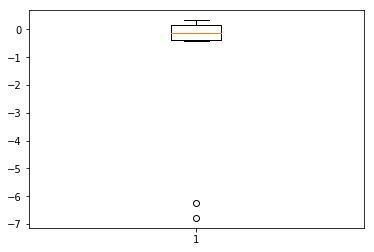

In [165]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores

Conclusion: Score cannot be predicted by the table of RedMetrics data (30/01/2018)

In [166]:
# Remove id
anonymousData = allDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = anonymousData[anonymousData["scoreafter"] >= 0].drop("scoreafter", axis = 1)
target = anonymousData[anonymousData["scoreafter"] >= 0]["scoreafter"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

/home/emma/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


array([ 0.13014122, -0.21644092, -0.07950353,  0.14988117,  0.21610374,
        0.02491909, -8.52822151, -0.34108571, -6.44812503, -0.33395473])

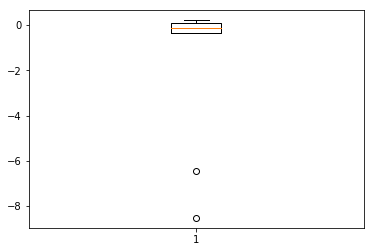

In [167]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores

Conclusion: Score cannot be predicted by the table of RedMetrics data + second degree polynomial (30/01/2018)

Let's try by reducing the number of features

In [168]:
# Remove id
anonymousData = allDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = anonymousData[anonymousData["scoreafter"] >= 0]
features = features[["craft", "death", "add", "remove", "reach", "maxChapter"] + list(range(15))]
target = anonymousData[anonymousData["scoreafter"] >= 0]["scoreafter"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

array([ 0.21438932, -0.21052777, -0.12576408,  0.11988908,  0.23608696,
       -0.03527969, -5.25189611, -0.39728224, -8.17428117, -0.2656018 ])

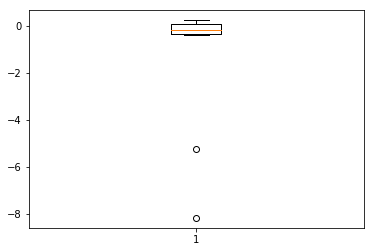

In [169]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores

Conclusion: Tried different combinations, but cannot find any interesting regression

# Questionnaire and RedMetrics

## Can the biology level of a player be predicted using the game data?

In [170]:
# Remove id
anonymousData = gameAndCorrectedAfterDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = anonymousData[anonymousData["scoreafter"] >= 0]
features = features.loc[:,"sessionsCount":"maxChapter"]
target = anonymousData[anonymousData["scoreafter"] >= 0]["biologyStudy"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

array([-2.        , -0.92729767, -0.14233842, -1.19506173, -0.09876543,
       -1.27336861, -0.39506173, -0.04565572, -7.2       , -2.98765432])

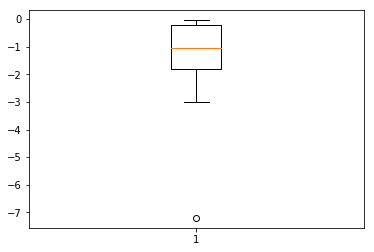

In [171]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores

Conclusion: No (30/01/2018)

## Can the gaming profile of a player be predicted using the game data?

In [172]:
# Remove id
anonymousData = gameAndCorrectedAfterDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = anonymousData.loc[:,"sessionsCount":"maxChapter"]
target = sum(anonymousData["gameInterest"], anonymousData["gameFrequency"])

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

array([-0.72565158, -0.97831978, -0.10432099, -0.20454545, -0.00383142,
       -0.06520062, -0.00653595, -0.0017094 , -0.19790498, -0.00653595])

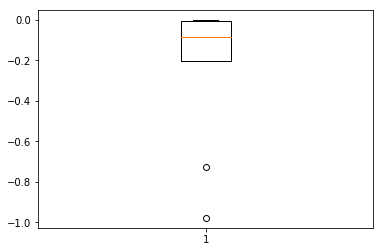

In [173]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores

Conclusion: No (30/01/2018)

## Can the completion time of each chapter be used to predict if a player is going to answer a specific scientific question correctly

In [174]:
# Given a question tag, plot scores of cross-validated model
def tryClassification(data, scientificQuestion):
    # Remove id
    anonymousData = data.drop("anonymousID", axis = 1)

    # Get features and target
    # Only select rows where scoreafter is not negative
    features = anonymousData[anonymousData["scoreafter"] >= 0]
    features = features.loc[:,"sessionsCount":"maxChapter"]
    target = anonymousData[anonymousData["scoreafter"] >= 0].loc[:,scientificQuestion].astype('int')

    # Add polynomial features
    secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
    features = secondDegreeFeatures.fit_transform(features)

    # Center and scale data
    features = preprocessing.scale(features)
    
    # Classify using extra tree classifiers, more random than random forest methods
    clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
    scores = cross_val_score(clf, features, target, cv=5)
    
    # Display plot
    fig, ax = plt.subplots()
    boxplot(scores)
    
    return [scores.mean(), scores.std()]

/home/emma/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/emma/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/emma/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
Mean,0.933333,0.767249,0.837995,0.589161,0.668298,0.563986,0.765967,0.685548,0.800000,0.850000,...,0.786946,0.916667,0.916667,0.933333,0.716667,0.499883,0.594872,0.723660,0.952564,0.916667
Var,0.033333,0.057002,0.062591,0.135103,0.141898,0.076982,0.063945,0.164329,0.113039,0.062361,...,0.149727,0.052705,0.000000,0.033333,0.171594,0.126439,0.086258,0.147496,0.038802,0.000000


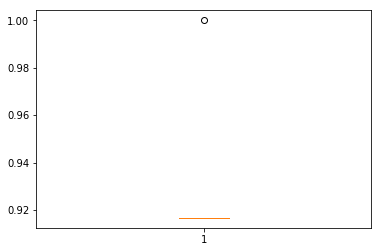

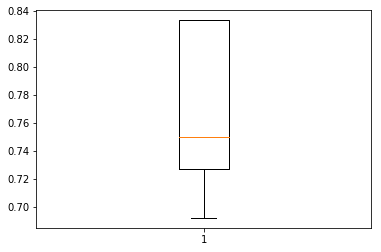

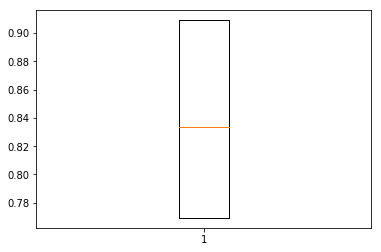

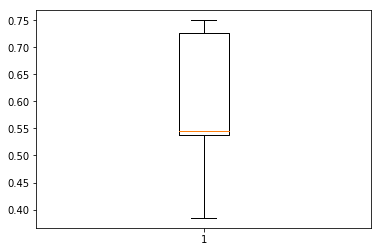

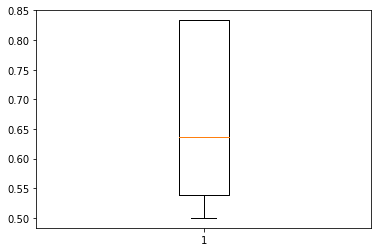

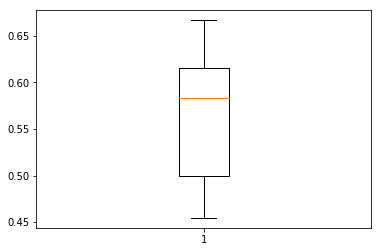

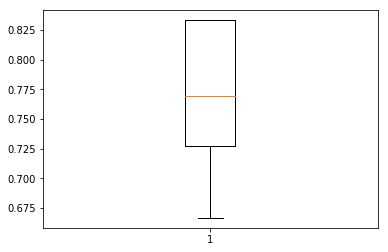

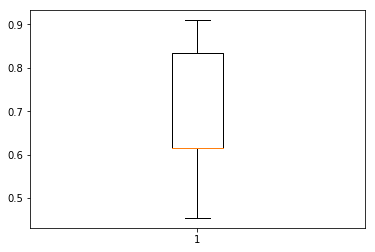

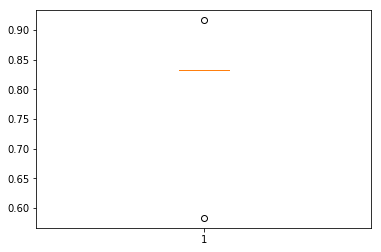

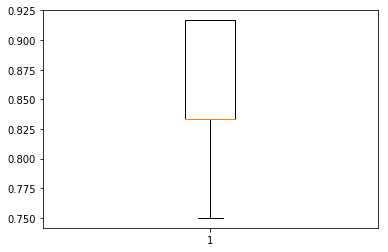

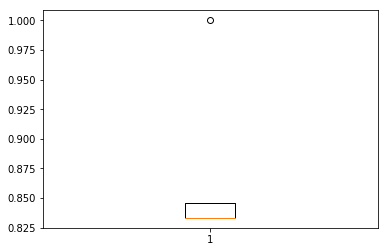

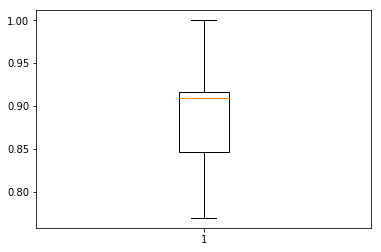

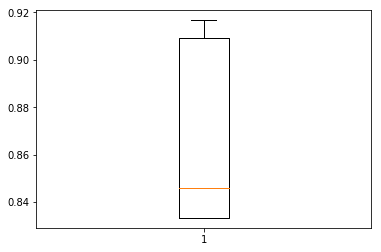

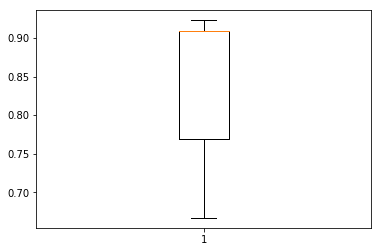

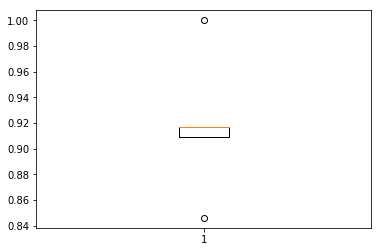

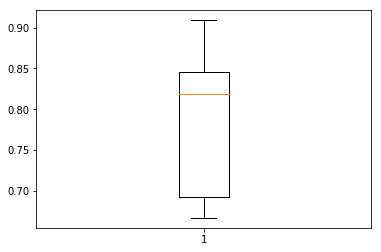

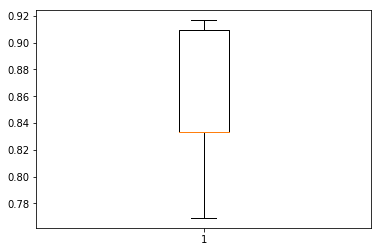

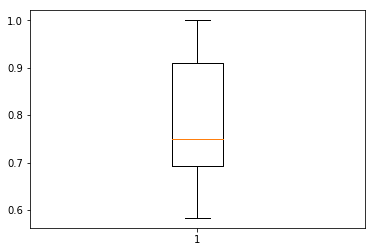

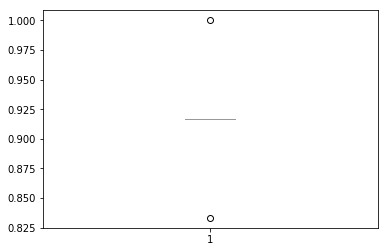

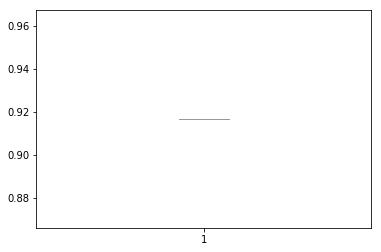

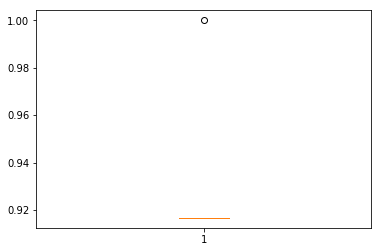

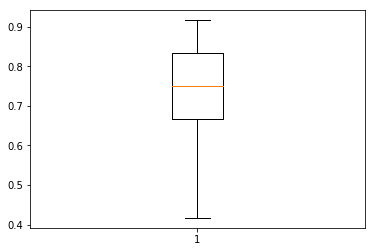

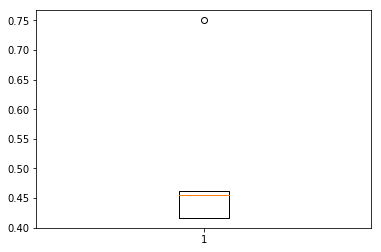

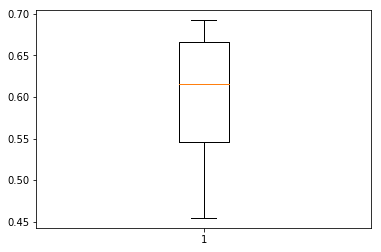

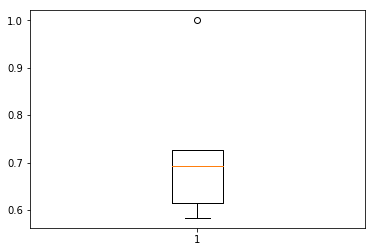

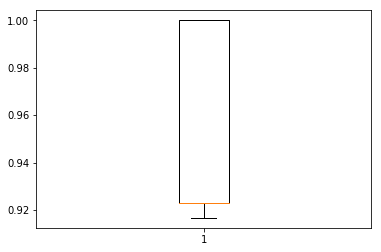

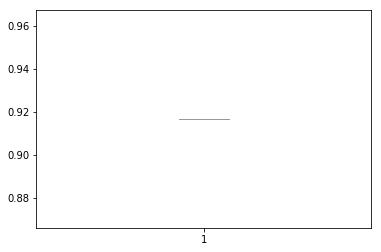

In [175]:
allScores = pd.DataFrame(index = ["Mean", "Var"])
for questionNb in range(27):
    questionTag = "Q" + str(questionNb + 1)
    scores = tryClassification(gameAndCorrectedAfterDataClassif, questionTag)
    allScores[questionTag] = scores
allScores

Conclusion: Redmetrics can be used to predict answers to certain scientific questions (30/01/2018)
TODO Raphael: Check which questions you want additional analysis for

## Can the game data be used to predict the performance on a sub-group of scientific questions?

### Hard questions Q17-Q21-Q23-Q24

0.7352380952380952

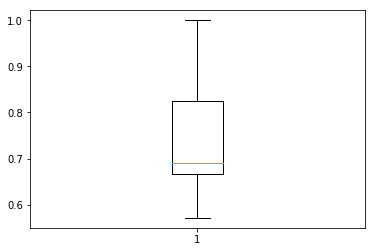

In [176]:
# Remove id
anonymousData = gameAndCorrectedAfterDataClassif.drop("anonymousID", axis = 1)

# Get features and target
features = pd.concat([anonymousData.loc[:,"sessionsCount":"maxChapter"], anonymousData.loc[:,"gameInterest":"androidPlay"]], axis=1)
target = anonymousData.loc[:,["Q17", "Q21", "Q23", "Q24"]].astype(int).sum(axis=1)
target = target.apply(lambda x: 0 if x < 3 else 1)

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)
    
# Classify using extra tree classifiers, more random than random forest methods
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target, cv=10)
    
# Display plot
boxplot(scores)
scores.mean()

In [177]:
# Classify using random forests -accounts for the small size of the dataset and the categorical nature of the features, limit overfitting
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target)
scores.mean()

0.7670426065162906

Conclusion: Low quality prediction (1/02/2018)

### Biobrick symbol recognition Q3 -> Q10

In [178]:
# Remove id
anonymousData = gameAndCorrectedAfterDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = pd.concat([anonymousData.loc[:,"sessionsCount":"maxChapter"], anonymousData.loc[:,"gameInterest":"androidPlay"]], axis=1)
target = anonymousData.loc[:,"Q3":"Q10"].astype(int).sum(axis=1)

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

0.4730589943046143

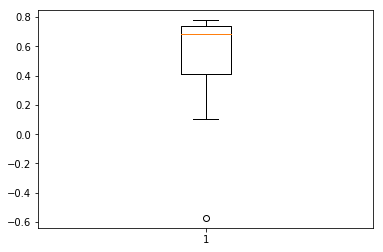

In [179]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores.mean()

Conclusion: No apparent possible prediction (1/02/2018)

### Easy questions Q1->Q7-Q9-Q10-Q15-Q16-Q19-Q20

In [180]:
# Remove id
anonymousData = gameAndCorrectedAfterDataClassif.drop("anonymousID", axis = 1)

# Get features and target
features = pd.concat([anonymousData.loc[:,"sessionsCount":"maxChapter"], anonymousData.loc[:,"gameInterest":"androidPlay"]], axis=1)
target = anonymousData.loc[:,["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q9", "Q10", "Q15", "Q16", "Q19", "Q20"]].astype(int).sum(axis=1)

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

0.6378100084330243

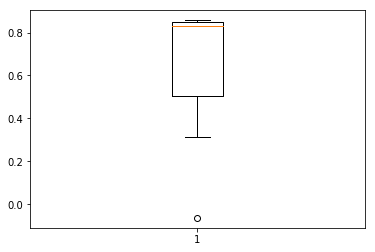

In [181]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores.mean()

(array([ 2.,  0.,  1.,  2.,  1.,  1.,  3.,  2.,  0.,  2.,  9., 10., 27.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 13 Patch objects>)

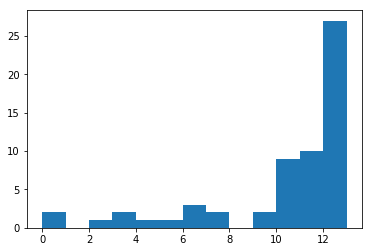

In [182]:
plt.hist(target, bins = range(14))

Conclusion: Inconclusive (01/02/2018)

## Can the completion time be predicted from questionnaire answers?

### From the before questionnaire

In [183]:
# Remove id
anonymousData = gameAndCorrectedBeforeDataClassif.drop("anonymousID", axis = 1)

# Get features and target
features = anonymousData.loc[:,"gameInterest":"gender_Prefer not to say"]
target = anonymousData.loc[:,"completionTime"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

/home/emma/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/emma/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/emma/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/emma/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. 

-84.41743388693787

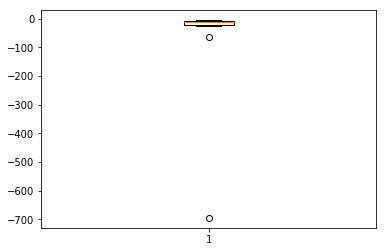

In [184]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores.mean()

0.6752747252747253

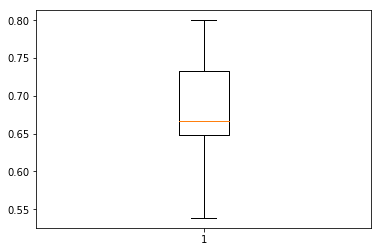

In [185]:
# Try classification
target = target.apply(lambda x: 0 if x < 10000 else 1) #0 if short, 1 if long

# Classify using extra tree classifiers, more random than random forest methods
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target, cv=10)
    
# Display plot
boxplot(scores)
scores.mean()

Conclusion: No (01/02/2018)

### From the after questionnaire

In [197]:
# Remove id
anonymousData = gameAndCorrectedAfterDataClassif.drop("anonymousID", axis = 1)

# Get features and target
features = anonymousData.loc[:,"gameInterest":"gender_Prefer not to say"]
target = anonymousData.loc[:,"completionTime"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

-10.437875580600997

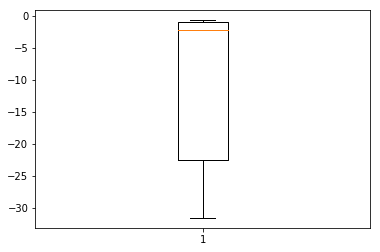

In [198]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores.mean()

0.6747619047619048

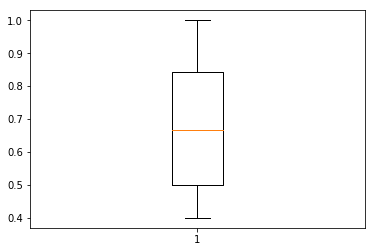

In [199]:
# Try classification
target = target.apply(lambda x: 0 if x < 10000 else 1) #0 if short, 1 if long

# Classify using extra tree classifiers, more random than random forest methods
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target, cv=10)
    
# Display plot
boxplot(scores)
scores.mean()

Conclusion: No (01/02/2018)